<a href="https://colab.research.google.com/github/trifarameliniaa/SKRIPSI/blob/main/file%20skripsinya%20fara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [2]:
from PIL import Image

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

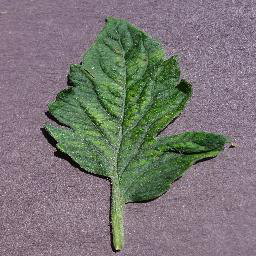

In [4]:
img = Image.open('/content/Tomato_Tomato_mosaic_virus15.jpg')
img

In [5]:
img.size

(256, 256)

In [6]:
img_array = np.array(img)
img_array

array([[[146, 127, 146],
        [140, 121, 140],
        [135, 116, 135],
        ...,
        [125, 110, 129],
        [160, 145, 164],
        [148, 133, 152]],

       [[140, 121, 140],
        [145, 126, 145],
        [147, 128, 147],
        ...,
        [118, 103, 122],
        [139, 124, 143],
        [140, 125, 144]],

       [[139, 120, 139],
        [135, 116, 135],
        [131, 112, 131],
        ...,
        [130, 115, 134],
        [146, 131, 150],
        [146, 131, 150]],

       ...,

       [[154, 134, 146],
        [116,  96, 108],
        [150, 130, 142],
        ...,
        [135, 117, 133],
        [134, 116, 132],
        [132, 114, 130]],

       [[118,  98, 110],
        [138, 118, 130],
        [135, 115, 127],
        ...,
        [129, 111, 127],
        [128, 110, 126],
        [128, 110, 126]],

       [[107,  87,  99],
        [119,  99, 111],
        [155, 135, 147],
        ...,
        [140, 122, 138],
        [141, 123, 139],
        [145, 127, 143]]

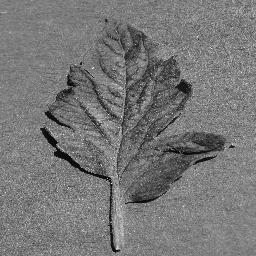

In [7]:
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
imgGray

In [8]:
imgG_array = np.array(imgGray)
imgG_array

array([[135, 129, 124, ..., 117, 152, 140],
       [129, 134, 136, ..., 110, 131, 132],
       [128, 124, 120, ..., 122, 138, 138],
       ...,
       [141, 103, 137, ..., 124, 123, 121],
       [105, 125, 122, ..., 118, 117, 117],
       [ 94, 106, 142, ..., 129, 130, 134]], dtype=uint8)

In [9]:
np.min(imgG_array),np.max(imgG_array)

(0, 247)

## FIS (Fuzzy Information System)

Pada bagian ini meliputi: 
- Representasi citra grayscale ke dalam fungsi keanggotaan fuzzy
- Mengkuantifikasi ketidakpastian yang dihasilkan akibat kekurangan informasi menggunakan entropi

## MF linier naik

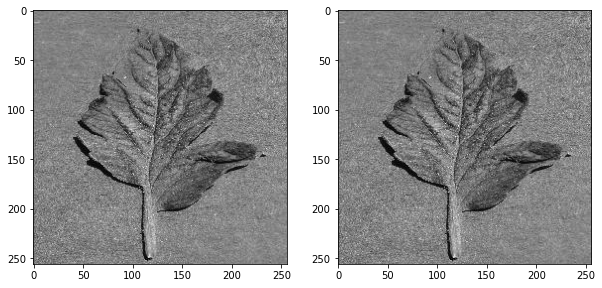

In [12]:
def fungsi_linier(x):
  a = 0;
  b = 247;
  miu = (x - a)/(b-a)
  return miu

plt.figure(figsize=(10,5))
plt.gray()
plt.subplot(121)
plt.imshow(imgG_array/256)
plt.subplot(122)
plt.imshow(fungsi_linier(imgG_array/256))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


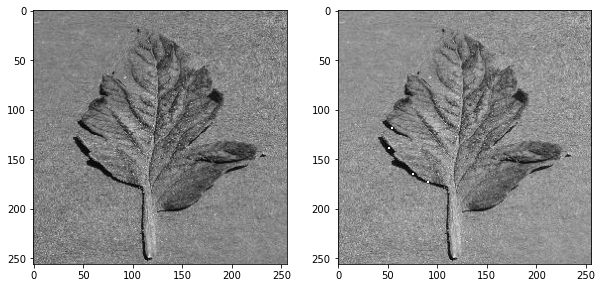

In [ ]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

plt.figure(figsize=(10,5))
plt.gray()
plt.subplot(121)
plt.imshow(img_fuzzy/256)
plt.subplot(122)
plt.imshow(entropi(img_fuzzy/256))
plt.show()

In [ ]:
def fungsi_linier(x):
  a = 0;
  b = 247;
  miu = (x - a)/(b-a)
  return miu

In [ ]:
img_fuzzy = fungsi_linier(imgG_array)
img_fuzzy

array([[0.5465587 , 0.52226721, 0.50202429, ..., 0.47368421, 0.61538462,
        0.56680162],
       [0.52226721, 0.54251012, 0.55060729, ..., 0.44534413, 0.53036437,
        0.53441296],
       [0.51821862, 0.50202429, 0.48582996, ..., 0.49392713, 0.55870445,
        0.55870445],
       ...,
       [0.5708502 , 0.41700405, 0.55465587, ..., 0.50202429, 0.49797571,
        0.48987854],
       [0.42510121, 0.50607287, 0.49392713, ..., 0.47773279, 0.47368421,
        0.47368421],
       [0.3805668 , 0.4291498 , 0.57489879, ..., 0.52226721, 0.52631579,
        0.54251012]])

In [ ]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

In [ ]:
FEM = entropi(img_fuzzy)
FEM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


array([[0.47635413, 0.48943748, 0.49909795, ..., 0.51063277, 0.43103983,
        0.46425826],
       [0.48943748, 0.47864477, 0.47402023, ..., 0.51971995, 0.48525382,
        0.48309494],
       [0.49146156, 0.49909795, 0.50598055, ..., 0.50263501, 0.4692239 ,
        0.4692239 ],
       ...,
       [0.46171271, 0.52620352, 0.47164338, ..., 0.49909795, 0.50089022,
        0.50433192],
       [0.52462664, 0.49725858, 0.50263501, ..., 0.50913139, 0.51063277,
        0.51063277],
       [0.53042578, 0.52375449, 0.45912573, ..., 0.48943748, 0.48736812,
        0.47864477]])

In [ ]:
FEM.shape, FEM.dtype

((256, 256), dtype('float64'))

## MF segitiga dan linier


## MF Sigmoid

# K-Means Klastering

In [ ]:
pixel_vals = image.reshape((-1,3))
print(pixel_vals.dtype, pixel_vals.shape)

In [ ]:
Z = np.float32(pixel_vals)
print(Z.dtype, Z.shape)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(label)

In [ ]:
print(center)

In [ ]:
center = np.uint8(center)
center

In [ ]:
segmented_data = center[label.flatten()]
segmented_data

In [ ]:
segmented_image = segmented_data.reshape((image.shape))
segmented_image

In [ ]:
plt.imshow(segmented_image)

In [ ]:
from PIL import Image
im = Image.fromarray(segmented_image)
im.save("outfile.jpeg")

# Evaluasi Performa 

In [ ]:
# PNSR (Peak Signal to Noise Ratio)
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): 
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/Tomato_Tomato_mosaic_virus15.jpg")
	compressed = cv2.imread("/content/outfile.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

PSNR value is 28.57453486540049 dB
